# Machine Learning Final Exam, Aug Semester, 2018

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.

Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 3 Guassians with distributions shaped roughly as shown in the diagram below. Plot the resulting 600 points with different colors for each Gaussian.

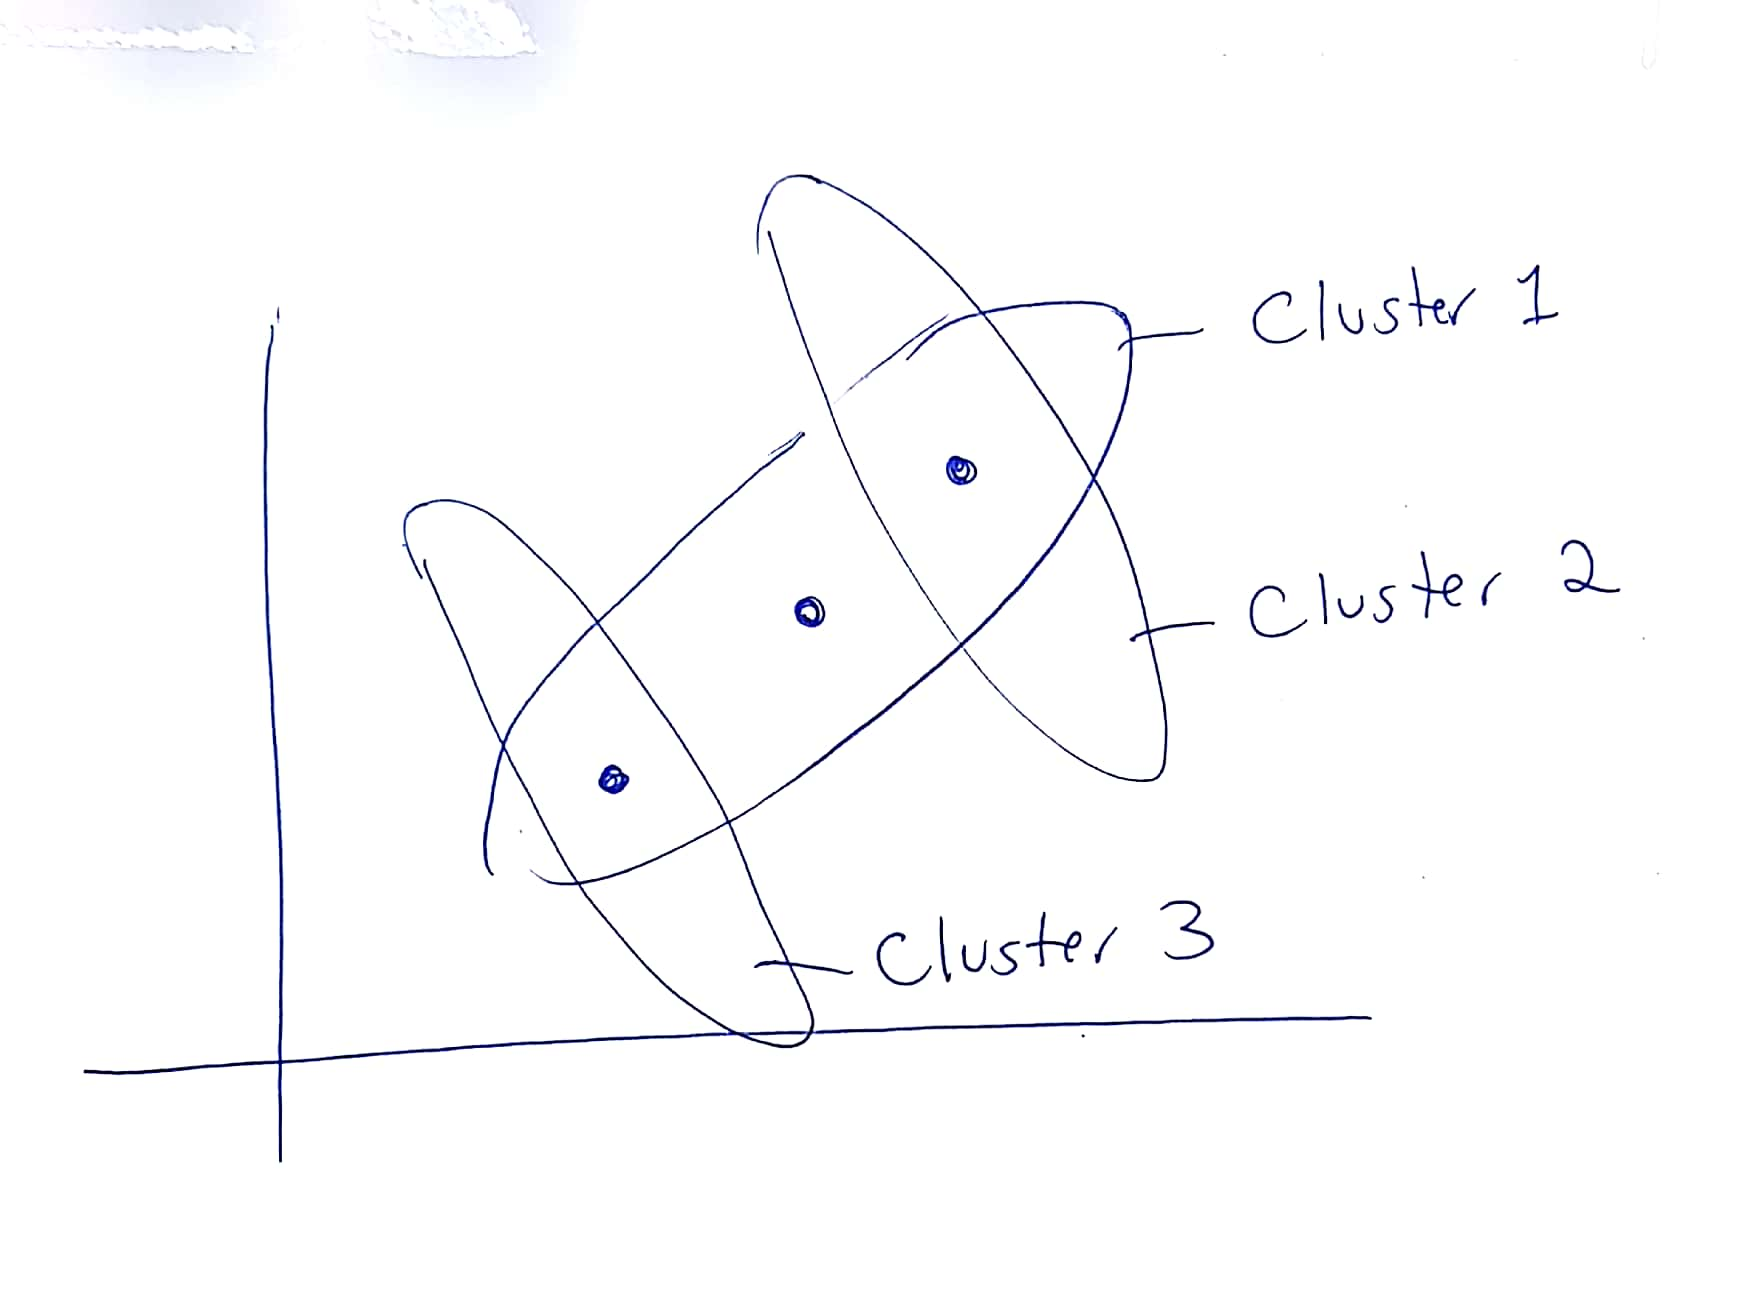


In [26]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_23393/2165491894.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:,0],X1[:,1],cmap='red')
/tmp/ipykernel_23393/2165491894.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2[:,0],X2[:,1],cmap='green')
/tmp/ipykernel_23393/2165491894.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X3[:,0],X3[:,1],cmap='blue')


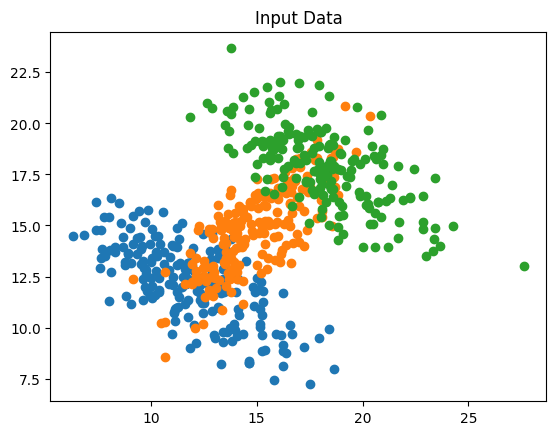

In [27]:
mu_1 = np.array([12,12])
mu_2 = np.array([15,15])
mu_3 = np.array([18,18])
sigma_1 = np.array([[6, -3], [-3, 3.5]])
sigma_2 = np.array([[4, 2.8], [2.8, 4]])
sigma_3 = np.array([[6, -3], [-3, 3.5]])
X1 = np.random.multivariate_normal(mu_1, sigma_1,200)
X2 = np.random.multivariate_normal(mu_2, sigma_2,200)
X3 = np.random.multivariate_normal(mu_3, sigma_3,200)
X = np.concatenate((X1,X2,X3),axis=0)

plt.scatter(X1[:,0],X1[:,1],cmap='red')
plt.scatter(X2[:,0],X2[:,1],cmap='green')
plt.scatter(X3[:,0],X3[:,1],cmap='blue')
plt.title("Input Data")
plt.show()

## Question 2 (10 points)

Fit a k-means model with k=3 to the data from Question 1. Plot the data with different colors indicating which cluster they are assigned to. Discuss whether it is a good model and why it is or is not good.

Iter 0 : distortion = 11.492102
Iter 10 : distortion = 7.054585
Iter 20 : distortion = 7.048827
Iter 30 : distortion = 7.048827
Iter 40 : distortion = 7.048827
Iter 50 : distortion = 7.048827
Iter 60 : distortion = 7.048827
Iter 70 : distortion = 7.048827
Iter 80 : distortion = 7.048827
Iter 90 : distortion = 7.048827


/tmp/ipykernel_23393/1951935679.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:,0],X1[:,1],cmap='red')
/tmp/ipykernel_23393/1951935679.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2[:,0],X2[:,1],cmap='green')
/tmp/ipykernel_23393/1951935679.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X3[:,0],X3[:,1],cmap='blue')


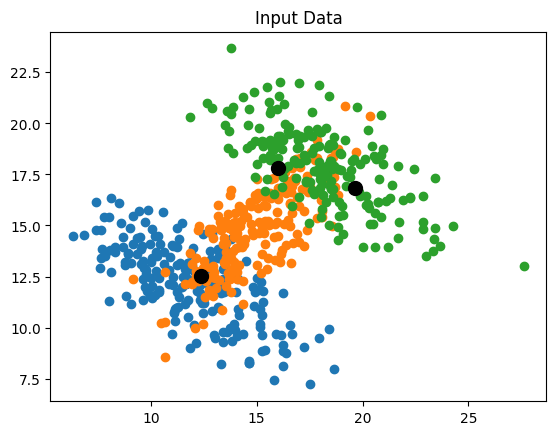

In [28]:
iters = 100
m,n = X.shape
k = 3 
indices = np.arange(m)
np.random.shuffle(indices)

#1. Initialize means
means = X[indices[0:3],:]
means

#2. Repeat until convergence

C = np.zeros(m,dtype=int)
for iter in range(iters):
    if iter == iters-1:
        plt.scatter(X1[:,0],X1[:,1],cmap='red')
        plt.scatter(X2[:,0],X2[:,1],cmap='green')
        plt.scatter(X3[:,0],X3[:,1],cmap='blue')
        plt.scatter(means[:,0],means[:,1],c ='black',s=100)
        plt.title('Input Data')
        plt.show()
    #2.1 map each datum to its nearest cluster center
    dist = 0
    for i in range(m):
        C[i] = np.argmin(np.linalg.norm(X[i,:]-means,axis=1))
        dist = dist + np.linalg.norm(X[i,:]-means[C[i],:])**2
    dist = dist/m
    if iter % 10 == 0:
        print('Iter %d : distortion = %f' % (iter,dist))
    
    #2.2 adjust means
    for j in range(k):
        means[j,:]=np.mean(X[C==j],axis=0)

Discuss whether it is a good model and why it is or is not good.
K-means is not suitable for the data that have overlap because K-means doesn't have an intrinsic measure for uncertainty.
The other reason is this data have some outlier which is not suitable for K-means because K-means use centroids to moved to the average (having outlier have negative impact on this process greatly).

## Question 3 (20 points)

Fit a GMM with k=3 to the data from Question 1. Plot the data with different colors indicating which Gaussian component they are assigned to. Discuss whether it is a good model and why it is or is not good, in comparison to the k-means model.

In [29]:
def init_gmm(X, k):
    m = X.shape[0]
    n = X.shape[1]
    Mu = np.zeros((n,k))
    Sigma = np.zeros((k,n,n))
    Phi = np.zeros(k)
    order = np.random.permutation(m)
    for j in range(k):
        # Initially assign equal probability to each cluster/outcome
        Phi[j] = 1/k      
        # Ramdomly assign mean to one of the data points       
        Mu[:,j] = X[order[j],:].T
        # Initial covariance is identity matrix
        Sigma[j,:,:] = np.eye(n)    
    return Phi, Mu, Sigma


def Gaussian(X, mean, covariance):
    k = len(mean)
    X = X - mean.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * np.sum(X @ np.linalg.pinv(covariance) * X, axis=1))
    return p

def gaussian(x, mean,covariance):
    k = len(mean)
    X = (x - mean).reshape(-1,1)
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * (X.T @ np.linalg.pinv(covariance) @ X))
    return p


# Run one iteration of EM

def iterate_em_gmm(X, threshold, Phi, Mu, Sigma):
    m = X.shape[0]
    n = X.shape[1]
    k = len(Phi)
    threshold = np.reshape(np.repeat(threshold, n*k), (n,k))
    pj_arr = np.zeros((m,k))
    
    # E-step: calculate w_j^i
    W = np.zeros((m, k))
    for j in range(k):
        pj = Gaussian(X, Mu[:,j], Sigma[j])
        pj_arr[:,j] = pj
        W[:,j] = Phi[j] * pj
    
    # W tells us what is the relative weight of each cluster for each data point
    W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T

    # M-step: adjust mean and sigma
    Phi[:] = sum(W) / m
    Mu_previous = Mu.copy()
    for j in range(k):
        # Split cluster specific W for each dimension
        Wj = np.tile(W[:,j],(2,1)).T
        # Compute Mu for each variable for each cluster
        Mu[:,j] = sum(X * Wj)/sum(Wj)
        Muj = np.tile(Mu[:,j],(m,1))
        Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

    if (abs(Mu-Mu_previous) <= threshold).all():
        converged = True
    else:
        converged = False

    labels = np.argmax(pj_arr, axis = 1)
    pj = np.max(pj_arr,axis=1)
    X_label = np.insert(X, 2, labels, axis=1)
    return converged, pj, X_label

In [30]:
threshold = np.matrix(.01)

Phi, Mu, Sigma = init_gmm(X, k)

converged = False
while not converged:
    converged, pj, X_label = iterate_em_gmm(X, threshold, Phi, Mu, Sigma)

print(converged, pj.shape, X_label.shape)

True (600,) (600, 3)


In [31]:
outlier_prob = .01
outliers = np.nonzero(pj < outlier_prob)[0]

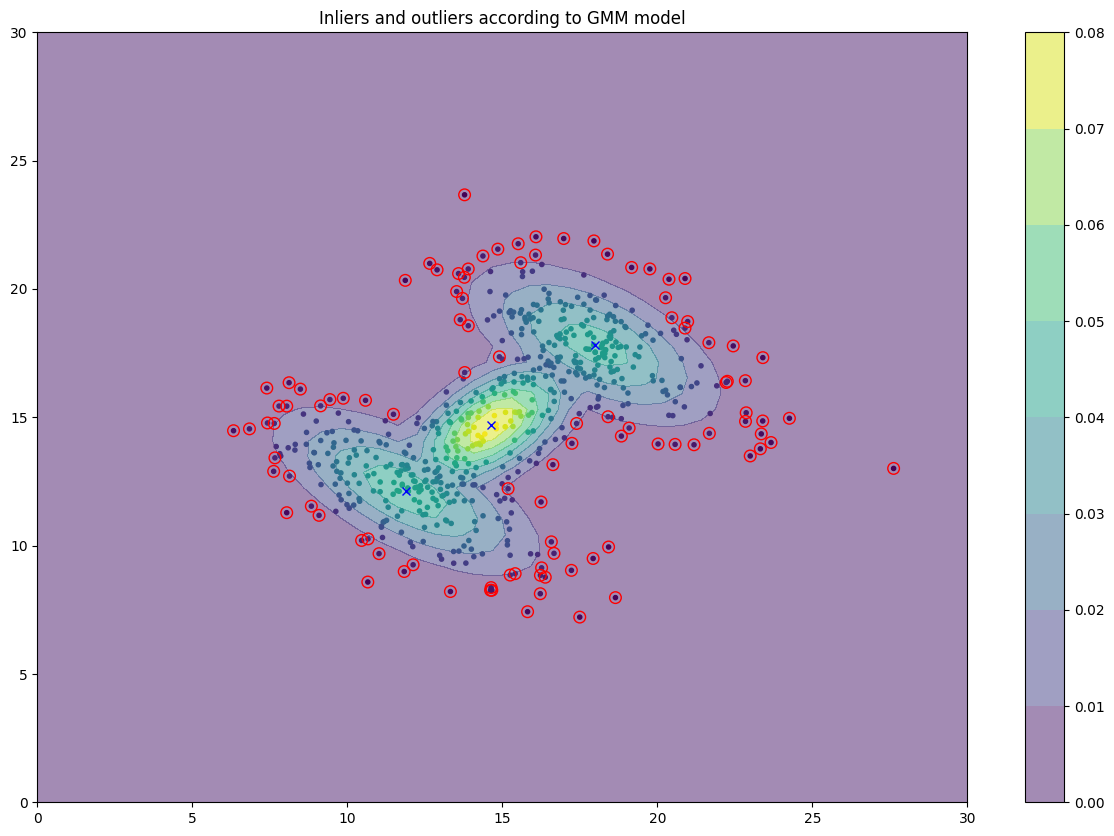

In [32]:
fig1 = plt.figure(figsize=(15,10))

xlist = np.linspace(0, 30, 50)
ylist = np.linspace(0, 30, 50)
XX, YY = np.meshgrid(xlist, ylist)
ZZ = np.zeros(XX.shape)

for c in np.arange(0,k):    
    X_class = X[np.where(X_label[:,2] == c)[0],:]
    
    Z = np.zeros(XX.shape)
    i = 0
    while i < XX.shape[0]:
        j = 0
        while j < XX.shape[0]:
            pt = np.array([[XX[i,j], YY[i,j]]])
            Z[i,j] = Gaussian(pt, Mu[:,c], Sigma[c])[0]
            j = j + 1
        i = i + 1    
    ZZ = np.maximum(ZZ,Z)
cp = plt.contourf(XX, YY, ZZ,alpha=0.5)
cbar = fig1.colorbar(cp)

plt.scatter(X[:,0],X[:,1],marker=".",c=pj,cmap='viridis');
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);
plt.plot(Mu[0,0], Mu[1,0],'bx',Mu[0,1], Mu[1,1],'bx', Mu[0,2], Mu[1,2],'bx')

plt.title('Inliers and outliers according to GMM model')
plt.show()

From the results, the model can clustering almost perfectly. 
This is mainly because GMMs algorithm classify the data based on gaussian distribution and our data is generated from gaussian distribution.

The gmms model work better than k-means due to those two reason given above.

## Question 4 (10 points)

Compare the Euclidean distortion for the 3 means learned by your k-means model in Question 2 and the 3 means learned by your GMM in Question 3. (By Euclidean distortion, we mean the sum squared Euclidean distance of the data points to their nearest means.) Which of the distortion values is lower?  Is the model with the lower Euclidean distortion the better model?  Why or why not?

In [33]:
Mu

array([[14.63652119, 17.974465  , 11.89577944],
       [14.68365762, 17.83198254, 12.12304455]])

## Question 5 (10 points)

Using the GMM model from Question 3, generate a LABELED dataset consisting of 200 points from each of the Gaussians, with the label of each point being the index of the Gaussian that generated it (1, 2, or 3).  Plot the data using different colors for the three components.

In [34]:
def plot_points(X, cor0, cor1, incor):
    fig1 = plt.figure(figsize=(5,5)) 
    ax = plt.axes() 
    ax.set_aspect(aspect = 'equal', adjustable = 'box')
    plt.title('Logistic regression boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(axis='both', alpha=.25)
    if len(cor0) != 0:
        ax.scatter(X[:, 0][cor0], X[:, 1][cor0], s=50, c='g', marker='.', label='y = 0')
    ax.scatter(X[:, 0][cor1], X[:, 1][cor1], s=50, c='b', marker='.', label='y = 0')
    ax.scatter(X[:, 0][incor], X[:, 1][incor], s=50, c='r', marker='.', label='y = 0')

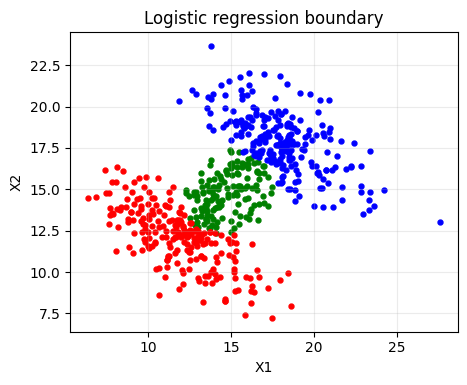

In [35]:
y = X_label[:, -1]
idx0 = np.where(y == 0)
idx1 = np.where(y == 1)
idx2 = np.where(y == 2)

plot_points(X, idx0, idx1, idx2)


In [36]:
np.unique(X_label[:, -1], return_counts=True)

(array([0., 1., 2.]), array([142, 237, 221]))

## Question 6 (30 points)

Split the data from Question 5 into a training set and validation set. Place 80% of the data in the training set and 20% of the data in the test set.  

Fit a neural network to the training data. The model should have a single hidden ReLU hidden layer and a 3-output softmax layer with cross entropy loss function.  

Build two models: one with a single unit in the hidden layer, and one with a sufficient number of units in the hidden layer to provide good classification results on both the training and validation sets. 

For the model with multiple hidden units, plot the loss on the training set and validation set as a function of training epoch.  

Analyze the loss curves: do you see evidence of overtraining?  If so, how should you deal with it? If not, why not, and how can you be sure you're obtaining the best possible results?

In [37]:
# Place code to build, train, and evaluate your PyTorch model here

import torch   #general pytorch
import torch.nn as nn  #neural network module
import torch.nn.functional as F  #useful functions like softmax, or relu

#pip install torchvision; conda install torchvision
from torchvision import datasets, transforms  #transforms for image processing
from torch.utils.data import DataLoader       #dataloader for preparing batch
from torch.utils.data import TensorDataset

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from torch.autograd import Variable


In [38]:
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_val, y_val = partition(X, y)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(480, 2) (480,) (120, 2) (120,)


In [39]:
class LinearModel(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        #out = self.sigmoid(out) # We do not need to output softmax as Crossentropy loss function will handle it for us
        
        return out

In [40]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [41]:
model = LinearModel(2, 200, 3).to(device)
J_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [42]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)

In [43]:
# Cast data to dataloader for more convenience
training_set = TensorDataset(X_train_tensor, y_train_tensor)
validation_set = TensorDataset(X_val_tensor, y_val_tensor)

In [44]:
train_batch_size = 4
val_batch_size = 1

train_dl = DataLoader(training_set, train_batch_size, shuffle=True)
val_dl = DataLoader(validation_set, val_batch_size, shuffle=True)

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

loss_list = []
num_epochs = 501  #it depends....trial and error....
#for num_epochs
for epoch in range(num_epochs):
    total_corr = 0
    val_total_corr = 0
    acc = 0
    val_acc = 0
    #for dataloader
    for batch, (x, y) in enumerate(train_dl):

        x = x.float().to(device) # Convert to float32
        y = y.long().to(device)

        #1. predict (forward pass)
        yhat = model(x) # (4, 2)
        # 1.1 Check accuracy
        predicted = torch.max(yhat, 1)[1]
        
        batch_corr = (predicted == y).sum()
        total_corr += batch_corr

        #2. calculate loss
        #print(yhat.shape)
        #print(y.shape)
        loss = J_fn(yhat, y)
        
        
        #3. calculate gradient
        optimizer.zero_grad()
        
        # 3.2 called backward() on loss to retrieve all the gradients (backpropagation/backward pass)
        loss.backward()
        
        # 4. update the parameters using the optim
        optimizer.step()  #optim already has learning rate, it also know all the parameters

    if epoch % 50 == 0:
        acc = (total_corr * 100) / (train_batch_size * (batch + 1))
        loss_list.append(loss)
        print(f"Training -> Epoch: {epoch:1.0f}: Loss: {loss:3.2f}; Acc: {acc:3.2f}")

Training -> Epoch: 0: Loss: 17.89; Acc: 0.00
Training -> Epoch: 50: Loss: 8.71; Acc: 24.38
Training -> Epoch: 100: Loss: 6.08; Acc: 24.38
Training -> Epoch: 150: Loss: 6.68; Acc: 24.38
Training -> Epoch: 200: Loss: 4.76; Acc: 24.38
Training -> Epoch: 250: Loss: 5.72; Acc: 24.38
Training -> Epoch: 300: Loss: 4.44; Acc: 24.38
Training -> Epoch: 350: Loss: 3.81; Acc: 24.38
Training -> Epoch: 400: Loss: 3.56; Acc: 24.38
Training -> Epoch: 450: Loss: 4.68; Acc: 24.38
Training -> Epoch: 500: Loss: 3.47; Acc: 24.38


In [46]:
train_loss = [loss.item() for loss in loss_list]

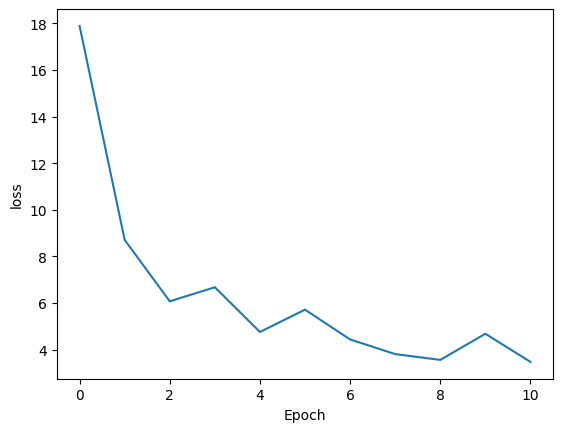

In [47]:
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(train_loss)

In [51]:
class NN(nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, 100)
        self.layer2 = nn.Linear(100, 200)
        self.layer3 = nn.Linear(200, output_size)
        #self.layer4 = nn.Linear(72, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        #out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)

        out = self.layer3(out)
        out = self.relu(out)

        #out = self.layer4(out)
        #out = self.relu(out)
        #out = self.sigmoid(out) # We do not need to output softmax as Crossentropy loss function will handle it for us

        return out

In [52]:
model = NN(2, 3).to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

loss_list = []
val_loss_list = []
y_true = [] # For testing
y_pred = [] # For testing
num_epochs = 500  #it depends....trial and error....
#for num_epochs
for epoch in range(num_epochs):
    total_corr = 0
    val_total_corr = 0
    acc = 0
    val_acc = 0
    #for dataloader
    for batch, (x, y) in enumerate(train_dl):

        x = x.float().to(device) # Convert to float32
        y = y.long().to(device)

        #1. predict (forward pass)
        yhat = model(x) # (4, 2)
        # 1.1 Check accuracy
        predicted = torch.max(yhat, 1)[1]
        
        batch_corr = (predicted == y).sum()
        total_corr += batch_corr

        #2. calculate loss
        #print(yhat.shape)
        #print(y.shape)
        loss = J_fn(yhat, y)
        
        
        #3. calculate gradient
        optimizer.zero_grad()
        
        # 3.2 called backward() on loss to retrieve all the gradients (backpropagation/backward pass)
        loss.backward()
        
        # 4. update the parameters using the optim
        optimizer.step()  #optim already has learning rate, it also know all the parameters

    if epoch % 50 == 0:
        acc = (total_corr * 100) / (train_batch_size * (batch + 1))
        #print(f'Accuracy for training set: total_corr {total_corr} train batch size {train_batch_size} batch + 1 {batch + 1}')
        loss_list.append(loss)
        print(f"Training -> Epoch: {epoch:1.0f}: Loss: {loss:3.2f}; Acc: {acc:3.2f}")

        model.eval()
        with torch.no_grad():
            for val_batch, (val_x, val_y) in enumerate(val_dl):
                
                val_x = val_x.float().to(device)
                val_y = val_y.long().to(device)

                val_yhat = model(val_x)

                val_predicted = torch.max(val_yhat, 1)[1]
                val_batch_corr = (val_predicted == val_y).sum()
                val_total_corr += val_batch_corr
                
                # # For testing
                # pred = np.round(val_predicted.detach().cpu().numpy())
                # y_var = val_predicted
                # y_true.extend(val_y.tolist()) 
                # y_pred.extend(pred.reshape(-1).tolist())
                # # End of testing
        
        model.train()

    val_loss = J_fn(val_yhat, val_y)
            #print(f'val_loss = {val_loss}')

    if epoch % 50 == 0:
        val_loss_list.append(val_loss)
        #print(f'Accuracy for validation set: total_corr {val_total_corr} train batch size {val_batch_size} batch + 1 {val_batch + 1}')
        val_acc = ((val_total_corr * 100) / ((val_batch + 1) * 100)) * 100
        #print("Accuracy on validation set is" , accuracy_score(y_pred, y_true))
        print(f"Validation -> Epoch: {epoch:1.0f}: Loss: {val_loss.item():3.2f}; Acc: {val_acc.item():3.2f}")

Training -> Epoch: 0: Loss: 1.36; Acc: 39.79
Validation -> Epoch: 0: Loss: 0.68; Acc: 45.00
Training -> Epoch: 50: Loss: 1.09; Acc: 48.13
Validation -> Epoch: 50: Loss: 1.45; Acc: 61.67
Training -> Epoch: 100: Loss: 1.23; Acc: 52.08
Validation -> Epoch: 100: Loss: 0.80; Acc: 60.83
Training -> Epoch: 150: Loss: 1.08; Acc: 55.21
Validation -> Epoch: 150: Loss: 1.34; Acc: 64.17
Training -> Epoch: 200: Loss: 0.89; Acc: 57.50
Validation -> Epoch: 200: Loss: 0.55; Acc: 63.33
Training -> Epoch: 250: Loss: 1.00; Acc: 63.96
Validation -> Epoch: 250: Loss: 1.49; Acc: 71.67
Training -> Epoch: 300: Loss: 1.04; Acc: 68.96
Validation -> Epoch: 300: Loss: 0.82; Acc: 75.83
Training -> Epoch: 350: Loss: 0.65; Acc: 71.88
Validation -> Epoch: 350: Loss: 0.65; Acc: 78.33
Training -> Epoch: 400: Loss: 0.76; Acc: 73.96
Validation -> Epoch: 400: Loss: 0.57; Acc: 78.33
Training -> Epoch: 450: Loss: 1.02; Acc: 75.00
Validation -> Epoch: 450: Loss: 1.86; Acc: 78.33


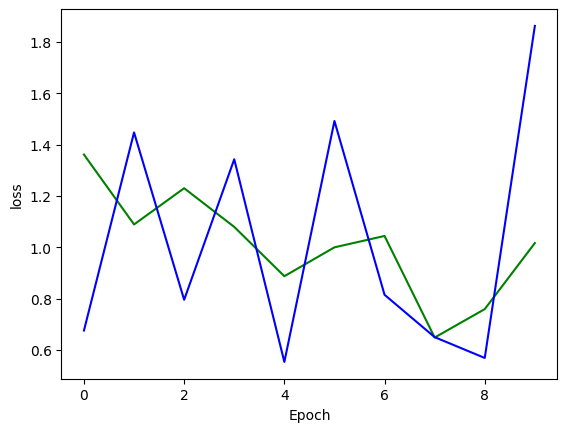

In [56]:
train_loss = [loss.item() for loss in loss_list]
val_train_loss = [loss.item() for loss in val_loss_list]

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(train_loss, 'g')

#plt.xlabel('Epoch')
#plt.ylabel('loss')
plt.plot(val_train_loss, 'b')

Complex model:
First, by looking at the accuracy between training set and validation set it not show the sign of overfitting at all. 
In fact their accuracy is pretty close which is the very good sign. It indicate that your model is not too underfitting and not too overfitting.
But!, when we looking at the loss plot, we can see that the graph is starting to show the sign of overfitting (maybe it just sudden spike
or maybe it the starting point of overfitting).
I do not know for sure, in order to know I need to observe with more epochs.

I think right now the model is good enough, just as I mentioned before we need to observes more. If it the starting point of overfitting
then right our model is the best fit.

## Question 7 (10 points)

Dicuss whether a linear SVM would be successful at accurately classifying the dataset you created in Question 5. Explain why it would or would not be successful If you think it would not be successful, suggest what type of SVM could accurately classify the dataset, and why it would.

It very difficult for linear SVM to accurately classifying the dataset that we created.
The data have too much noise (overlapping).
Practically, I think none of the SVM algorithm can work well in this dataset but if I need to pick one
I think RBF kernel should be the best, because of it ability to create more complex decision boundary.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


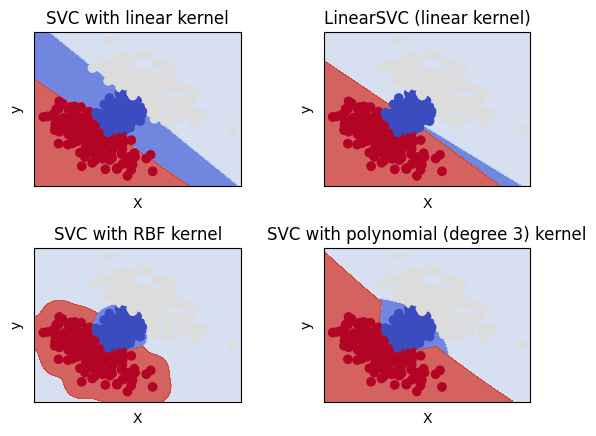

In [57]:
from sklearn import svm
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

h = .02

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()